# Data exploration & Visualization

### Preprocessing Exp41

In [65]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def gather_exp41(folder_path):
    exp41_data_path = [folder_path + '/csv_results_41_255439_mp-01-naamsestraat-35-maxim.csv',
                       folder_path + '/csv_results_41_255440_mp-02-naamsestraat-57-xior.csv',
                       folder_path + '/csv_results_41_255441_mp-03-naamsestraat-62-taste.csv',
                       folder_path + '/csv_results_41_255442_mp-05-calvariekapel-ku-leuven.csv',
                       folder_path + '/csv_results_41_255443_mp-06-parkstraat-2-la-filosovia.csv',
                       folder_path + '/csv_results_41_255444_mp-07-naamsestraat-81.csv',
                       folder_path + '/csv_results_41_255445_mp-08-kiosk-stadspark.csv',
                       folder_path + '/csv_results_41_280324_mp08bis---vrijthof.csv',
                       folder_path + '/csv_results_41_303910_mp-04-his-hears.csv']
    exp41_data = []
    
    for i in exp41_data_path:
        exp41_data.append(pd.read_csv(i, sep = ';'))
    return exp41_data


def divide_timestamp(df):
    df_final = df.copy()
    df_final['result_timestamp'] = df.result_timestamp.str[:19]
    df_final['year'] = df.result_timestamp.str[6:10].astype('int32')
    df_final['month'] = df.result_timestamp.str[3:5].astype('int32')
    df_final['day'] = df.result_timestamp.str[0:2].astype('int32')
    df_final['hour'] = df.result_timestamp.str[11:13].astype('int32')
    df_final['minute'] = df.result_timestamp.str[14:16].astype('int32')
    df_final['second'] = df.result_timestamp.str[17:19].astype('int32')
    return df_final


def drop_modify_exp41(df, first=True):
    final = []
    description_mapping = {
        'MP 01: Naamsestraat 35  Maxim': 'Naamsestraat 35',
        'MP 02: Naamsestraat 57 Xior': 'Naamsestraat 57',
        'MP 03: Naamsestraat 62 Taste': 'Naamsestraat 62',
        'MP 05: Calvariekapel KU Leuven': 'Calvariekapel KU Leuven',
        'MP 06: Parkstraat 2 La Filosovia': 'Parkstraat 2',
        'MP 07: Naamsestraat 81': 'Naamsestraat 81',
        'MP08bis - Vrijthof': 'Vrijthof'
    }
    
    for data in df:
        data_nan = data.dropna(subset=['noise_event_laeq_primary_detected_certainty'])
        data_nan_drop = data_nan.drop(['noise_event_laeq_model_id_unit', 'noise_event_laeq_primary_detected_certainty_unit', 'noise_event_laeq_primary_detected_class_unit'], axis=1)
        data_nan_drop_uncertain75 = data_nan_drop[data_nan_drop['noise_event_laeq_primary_detected_certainty'] > 75]
        data_final = divide_timestamp(data_nan_drop_uncertain75)
        data_final['description'] = data_final['description'].replace(description_mapping)
        
        if first:
            le = LabelEncoder()
            data_final['noise_event_class'] = le.fit_transform(data_final['noise_event_laeq_primary_detected_class'])
            first = False
        else:
            data_final['noise_event_class'] = le.transform(data_final['noise_event_laeq_primary_detected_class'])
        
        final.append(data_final)
    
    return final

def initial_preprocessing_exp41(folder_path, first = True):
    exp41_data = gather_exp41(folder_path)
    exp41_final = drop_modify_exp41(exp41_data)
    return exp41_final

In [66]:
[df1_E, df2_E, df3_E, df4_E, df5_E, df6_E, df7_E, df8_E, df9_E] = initial_preprocessing_exp41("C:/Users/fieuw/Desktop/export_41", first=True)

In [95]:
df1 = pd.concat([df1_E,df2_E,df3_E,df4_E,df5_E,df6_E,df7_E,df8_E,df9_E], ignore_index=True)

### Some Visuals for Exp41

We make a line chart that displays the counts of a specific event over time for different streets.
https://plotly.com/python/time-series/

We aggregate first the data so that we display an average count for the hour. This shows which events are most present during which times in the different locations.  

Ideally, in the dashboard we make it interactive with a drop-down menu, so that we can select the specific type of event we want to inspect. 

In [47]:
import plotly.express as px

class NoiseGraphGenerator:
    def __init__(self, data_frames):
        self.data_frames = data_frames
    
    def generate_graph(self, noise_class):
        concatenated_data = pd.concat(self.data_frames, ignore_index=True)
        shouting_data = concatenated_data[concatenated_data['noise_event_laeq_primary_detected_class'] == noise_class]
        grouped_data = shouting_data.groupby(['noise_event_laeq_primary_detected_class', 'description', 'hour']).size().reset_index(name='count')
        
        fig = px.line(grouped_data, x='hour', y='count', color='description', title=f'Average counts of {noise_class} per hour')
        fig.update_layout(
            xaxis_title='Hour',
            yaxis_title='Count',
            legend_title='Description',
            template='plotly_white'
        )
        
        return fig

data_frames = [df1_E, df2_E, df3_E, df4_E, df5_E, df6_E, df7_E, df8_E, df9_E]

noise_classes = [
    'Transport road - Siren',
    'Transport road - Passenger car',
    'Human voice - Shouting',
    'Human voice - Singing',
    'Music non-amplified',
    'Nature elements - Wind'
]

generator = NoiseGraphGenerator(data_frames)
for noise_class in noise_classes:
    graph = generator.generate_graph(noise_class)
    graph.show()



### Preprocessing Exp40

In [124]:
def gather_exp40(folder_path):
    exp40_data_path = [folder_path + '/csv_results_40_255439_mp-01-naamsestraat-35-maxim.csv',
                       folder_path + '/csv_results_40_255440_mp-02-naamsestraat-57-xior.csv',
                       folder_path + '/csv_results_40_255441_mp-03-naamsestraat-62-taste.csv',
                       folder_path + '/csv_results_40_255442_mp-05-calvariekapel-ku-leuven.csv',
                       folder_path + '/csv_results_40_255443_mp-06-parkstraat-2-la-filosovia.csv',
                       folder_path + '/csv_results_40_255444_mp-07-naamsestraat-81.csv',
                       folder_path + '/csv_results_40_255445_mp-08-kiosk-stadspark.csv',
                       folder_path + '/csv_results_40_280324_mp08bis---vrijthof.csv',
                       folder_path + '/csv_results_40_303910_mp-04-his-hears.csv']
    exp40_data = []
    
    for i in exp40_data_path:
        exp40_data.append(pd.read_csv(i, sep = ';'))
    return exp40_data

def divide_timestamp(df):
    df_final = df.copy()
    df_final['result_timestamp'] = df_final['result_timestamp'].str[:19]
    df_final['year'] = df_final['result_timestamp'].str[6:10].astype('int32')
    df_final['month'] = df_final['result_timestamp'].str[3:5].astype('int32')
    df_final['day'] = df_final['result_timestamp'].str[0:2].astype('int32')
    df_final['hour'] = df_final['result_timestamp'].str[11:13].astype('int32')
    df_final['day_month'] = df_final['day'].astype(str) + '/' + df_final['month'].astype(str)
    return df_final


def drop_modify_exp40(df, first=True):
    final = []
    description_mapping = {
        'MP 01: Naamsestraat 35  Maxim': 'Naamsestraat 35',
        'MP 02: Naamsestraat 57 Xior': 'Naamsestraat 57',
        'MP 03: Naamsestraat 62 Taste': 'Naamsestraat 62',
        'MP 04: His & Hears': 'His & Hears',
        'MP 05: Calvariekapel KU Leuven': 'Calvariekapel KU Leuven',
        'MP 06: Parkstraat 2 La Filosovia': 'Parkstraat 2',
        'MP 07: Naamsestraat 81': 'Naamsestraat 81',
        'MP08bis - Vrijthof': 'Vrijthof'
       
    }
    
    for data in df:
        datadrop = data.drop(["laf005_per_hour_unit", "laf01_per_hour_unit", "laf05_per_hour_unit", "laf10_per_hour_unit",
                   "laf25_per_hour_unit", "laf50_per_hour_unit", "laf75_per_hour_unit", "laf90_per_hour_unit",
                   "laf95_per_hour_unit", "laf98_per_hour_unit", "laf99_per_hour_unit", "laf995_per_hour_unit"],
                  axis=1).copy()
        data_final = divide_timestamp(datadrop)
        data_final['description'] = data_final['description'].replace(description_mapping)
        final.append(data_final)
    return final



def initial_preprocessing_exp40(folder_path, first = True):
    exp40_data = gather_exp40(folder_path)
    exp40_final = drop_modify_exp40(exp40_data)
    return exp40_final

In [125]:
[df1_N, df2_N, df3_N, df4_N, df5_N, df6_N, df7_N, df8_N, df9_N] = initial_preprocessing_exp40("C:/Users/fieuw/Desktop/export_40", first=True)

In [126]:
df2 = pd.concat([df1_N, df2_N, df3_N, df4_N, df5_N, df6_N, df7_N, df8_N, df9_N], ignore_index=True)

### Some Visuals for Exp40

what are the bussiest hours during the day? during the week? in the year? 
Can we associate it with events? 

In [127]:
import plotly.express as px

hourly_avg_desc = df2.groupby(['hour', 'description'])['laf005_per_hour'].mean().reset_index()

fig = px.line(hourly_avg_desc, x='hour', y='laf005_per_hour', color='description')
fig.update_layout(
    title='Average Noise Levels per Hour by Description',
    xaxis_title='Time of Day',
    yaxis_title='Average Noise Level'
)
fig.show()


### Merge between Exp40 & Exp41

we merge the dataframes _N with _E on description, month, day and hour 

In [110]:
merged = df1.merge(df2, on=['#object_id', 'description', 'year', 'month', 'day', 'hour'], how='inner')

### Heat map 

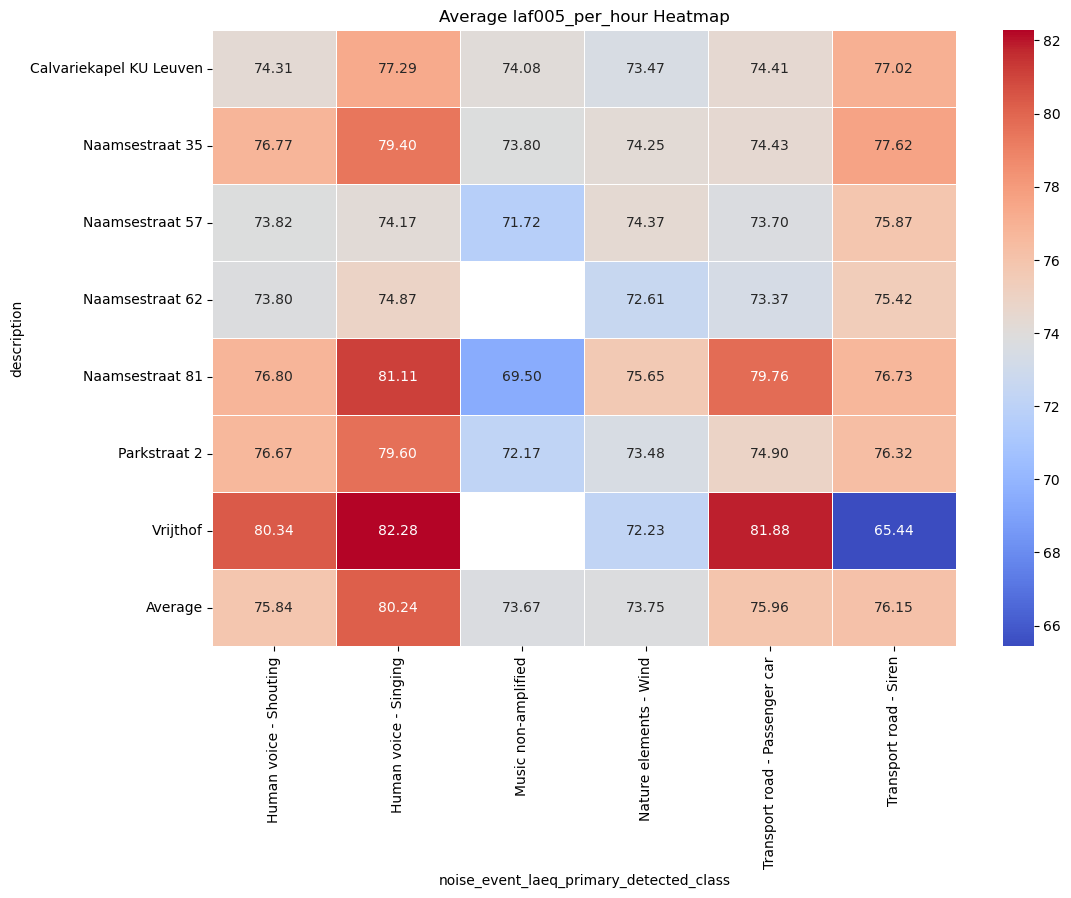

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class HeatmapVisualizer:
    def __init__(self, merged_dataframe):
        self.merged_dataframe = merged_dataframe
        self.heatmap_data = None

    def calculate_heatmap_data(self):
        self.heatmap_data = self.merged_dataframe.pivot_table(
            index='description',
            columns='noise_event_laeq_primary_detected_class',
            values='laf005_per_hour',
            aggfunc='mean'
        )

        average_by_class = self.merged_dataframe.groupby('noise_event_laeq_primary_detected_class')['laf005_per_hour'].mean()
        self.heatmap_data.loc['Average'] = average_by_class

    def plot_heatmap(self):
        plt.figure(figsize=(12, 8))
        sns.heatmap(self.heatmap_data, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
        plt.title('Average laf005_per_hour Heatmap')
        plt.xlabel('noise_event_laeq_primary_detected_class')
        plt.ylabel('description')
        plt.show()

merged_dataframe = merged  

heatmap_visualizer = HeatmapVisualizer(merged_dataframe)
heatmap_visualizer.calculate_heatmap_data()
heatmap_visualizer.plot_heatmap()



In general, singing seems to occur during hours that have detected louder noise levels 
Still we can not say that these events are the causes of these outlying noise values. 

### Boxplot noise values for different events 

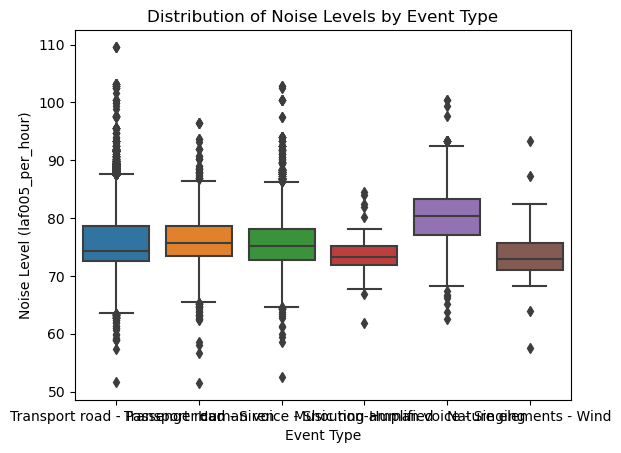

In [116]:
import seaborn as sns

sns.boxplot(data=merged, x='noise_event_laeq_primary_detected_class', y='laf005_per_hour')
plt.xlabel('Event Type')
plt.ylabel('Noise Level (laf005_per_hour)')
plt.title('Distribution of Noise Levels by Event Type')
plt.show()

### Time series

In [ ]:
import plotly.express as px
